In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [50]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [253]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [185]:
df.shape

(1436, 11)

In [153]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [155]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [16]:
### we could see no null values

In [156]:
df.duplicated().sum()

1

In [157]:
df.loc[df.duplicated(),:]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [51]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [159]:
df.loc[df.duplicated(),:]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [160]:
df.shape

(1435, 11)

In [161]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [188]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Price
[13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 16450 18900 18990 18500 19450 18800
 32500 31000 31275 24950 22950 24990 17900 19250 16350 21750 15850 23000
 19900 23950 24500 17200 19500 16868 19750 20750 17650 17795 18245 23750
 18700 21125  6950  9500 11950  7750  4350  4750 11750 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 14990 12850 11700 11895
 13875 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 14350
 10250  6500  6400  7000  8900  8500  8950  9250  9450  8250  4450  9000
  5150  7900 10900  9750 11290 10895 10995  9850  8695 10990  8750  9930
  9799  9700  9990  9475 10000 10495  9400  9650  9550 13000 11710  9980
 12250 11930 10800 10600  7500  5950  6900  5

In [58]:
### we can see that  every car have 4 cylinders so it will not have impact while predicting price
## so we can drop cylinders column 

In [52]:
df.drop(df.columns[[8]],axis=1,inplace=True)

In [274]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,5,1015


## REMOVING OUTLIERS


In [275]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'],
      dtype='object')

Rbemoving outliers of 'Price'

In [325]:
df['Price'].describe()

count     1435.000000
mean     10720.915679
std       3608.732978
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

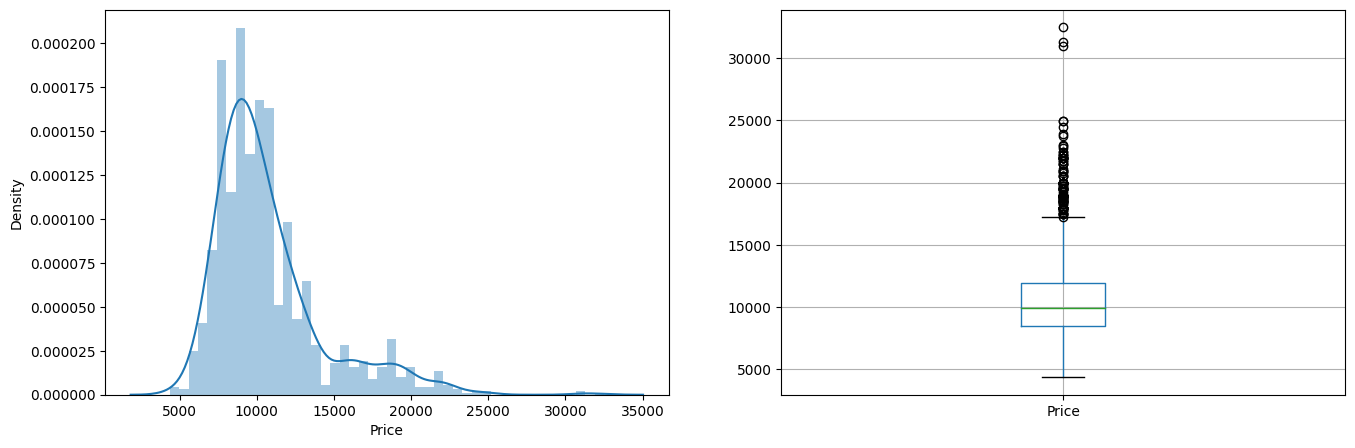

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Price'])

plt.subplot(1,2,2)
df1.boxplot('Price')
plt.show()

In [53]:
df1=df.copy()
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3)
## finding 1st and 3rd quantile

8450.0 11950.0


In [54]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR

print(Upper_Extreme)
print(Lower_Extreme)
## fixing uppere extreme salary and lower extreme salary

17200.0
3200.0


In [55]:
df1_outliers= df1[(df1.Price<Lower_Extreme)| (df1.Price>Upper_Extreme) ]

In [56]:
df1_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,6,1185
...,...,...,...,...,...,...,...,...,...,...
181,21125,2,225,Petrol,97,0,1400,5,5,1110
182,21500,2,15,Petrol,110,0,1600,5,5,1130
183,17795,1,1,Petrol,98,0,1400,4,5,1100
184,18245,1,1,Petrol,110,0,1600,5,5,1075


In [57]:
df1.loc[(df1.Price<Lower_Extreme),'Price']=Lower_Extreme
df1.loc[(df1.Price>Upper_Extreme),'Price' ]=Upper_Extreme

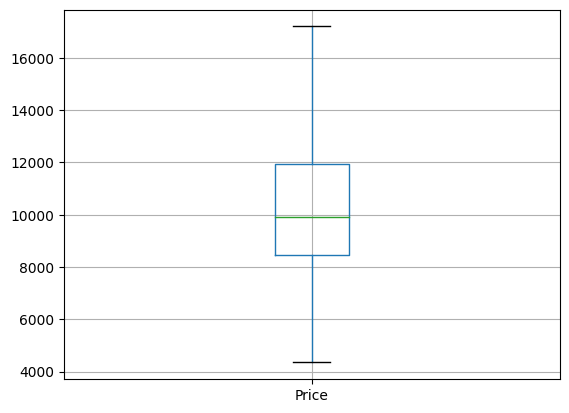

In [58]:
df1.boxplot('Price')
plt.show()

In [59]:
df=df1.copy()

Removing outliers of 'Age_08_04'

In [60]:
df['Age_08_04'].describe()

count    1435.000000
mean       55.980488
std        18.563312
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age_08_04, dtype: float64

In [61]:
df2=df.copy()

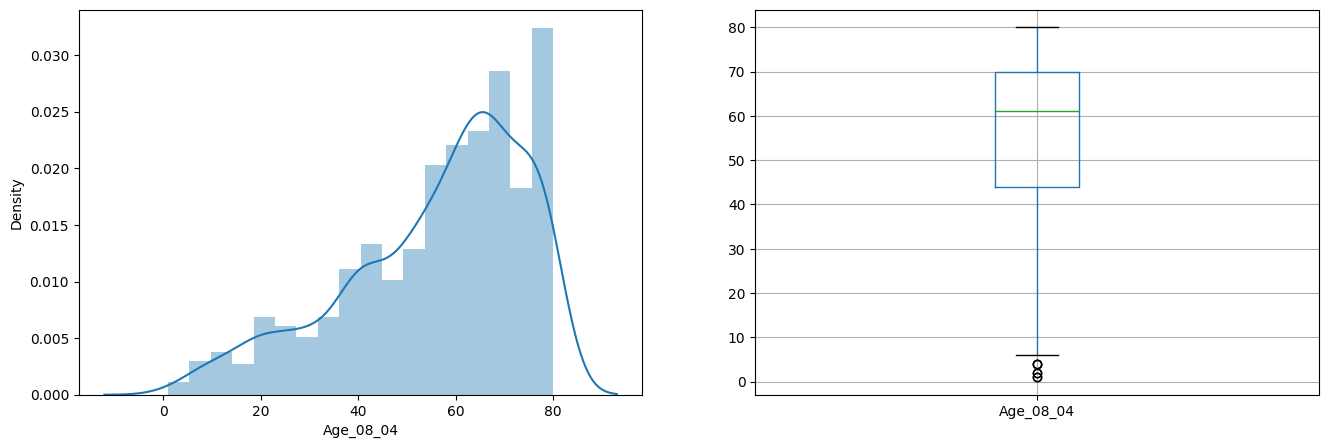

In [62]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Age_08_04'])

plt.subplot(1,2,2)
df2.boxplot('Age_08_04')
plt.show()

In [63]:
Q1=df2['Age_08_04'].quantile(0.25)
Q3=df2['Age_08_04'].quantile(0.75)
IQR=Q3-Q1


In [64]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR
print(Upper_Extreme)
print(Lower_Extreme)

109.0
5.0


In [65]:
df2_outliers= df2[(df2.Age_08_04<Lower_Extreme)| (df2.Age_08_04>Upper_Extreme) ]

In [66]:
df2_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
109,17200,4,1,Diesel,116,0,2000,5,5,1480
110,17200,4,4000,Diesel,116,0,2000,5,5,1480
111,17200,4,1500,Diesel,116,0,2000,5,5,1480
181,17200,2,225,Petrol,97,0,1400,5,5,1110
182,17200,2,15,Petrol,110,0,1600,5,5,1130
183,17200,1,1,Petrol,98,0,1400,4,5,1100
184,17200,1,1,Petrol,110,0,1600,5,5,1075


In [68]:
df2.loc[(df2.Age_08_04<Lower_Extreme),'Age_08_04']=Lower_Extreme
df2.loc[(df2.Age_08_04>Upper_Extreme),'Age_08_04' ]=Upper_Extreme

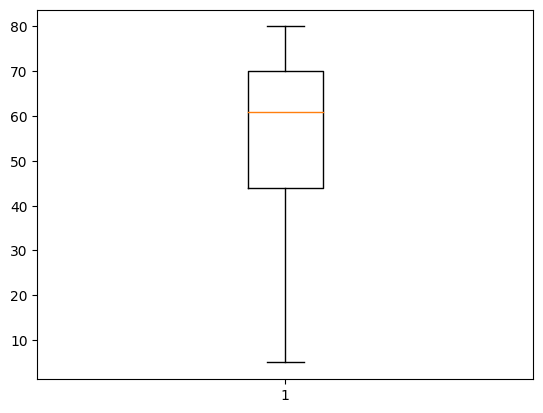

In [69]:
plt.boxplot(df2['Age_08_04'])
plt.show()

In [70]:
df=df2.copy()

Removing outliers of 'KM'

In [71]:
df3=df.copy()

In [72]:
df3['KM'].describe()

count      1435.000000
mean      68571.782578
std       37491.094553
min           1.000000
25%       43000.000000
50%       63451.000000
75%       87041.500000
max      243000.000000
Name: KM, dtype: float64

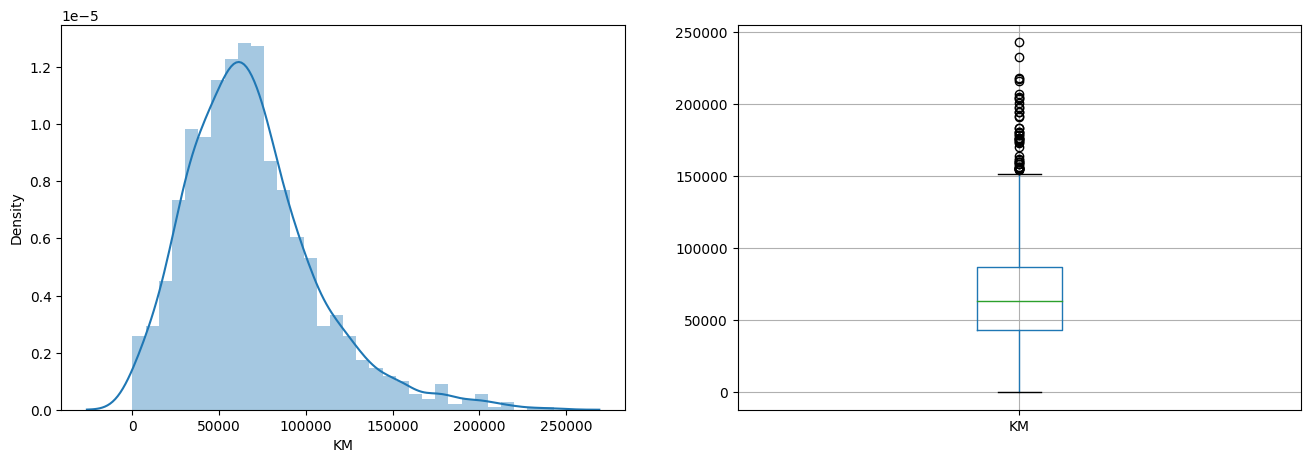

In [73]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['KM'])

plt.subplot(1,2,2)
df3.boxplot('KM')
plt.show()

In [74]:
Q1=df['KM'].quantile(0.25)
Q3=df['KM'].quantile(0.75)
IQR=Q3-Q1

In [75]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR

print(Upper_Extreme)
print(Lower_Extreme)

153103.75
-23062.25


In [76]:
df3_outliers= df3[(df3.KM<Lower_Extreme) | (df3.KM>Upper_Extreme) ]

In [77]:
df3_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
185,6950,43,243000,Diesel,69,0,1900,3,5,1110
186,9500,38,180638,Diesel,90,0,2000,4,5,1160
187,11950,40,179860,Diesel,90,0,2000,5,5,1205
188,7750,43,178858,CNG,110,0,1600,3,5,1084
189,11950,40,161000,Diesel,69,0,1900,3,5,1105
190,4350,44,158320,Diesel,69,0,1800,5,5,1110
377,6500,53,216000,Diesel,69,0,1900,3,5,1110
378,6400,51,198167,Diesel,69,0,1900,4,5,1095
379,7000,53,176000,Diesel,69,0,1900,3,5,1105
380,7750,54,174139,Diesel,72,0,2000,4,5,1100


In [78]:
df3.loc[(df3.KM<Lower_Extreme),'KM']=Lower_Extreme
df3.loc[(df3.KM>Upper_Extreme),'KM' ]=Upper_Extreme

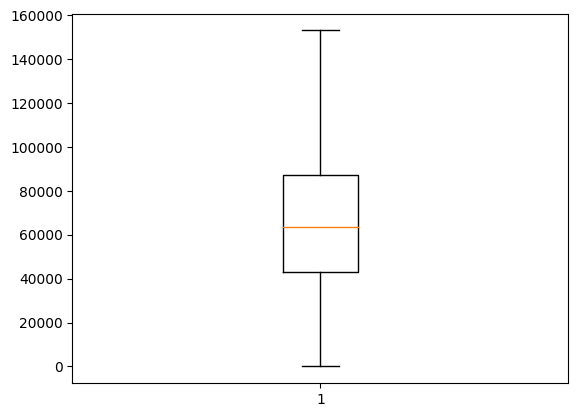

In [79]:
plt.boxplot(df3['KM'])
plt.show()

In [81]:
df=df3.copy()

Removing outliers of 'HP'

In [82]:
df['HP'].describe()

count    1435.000000
mean      101.491986
std        14.981408
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

In [83]:
df4=df.copy()

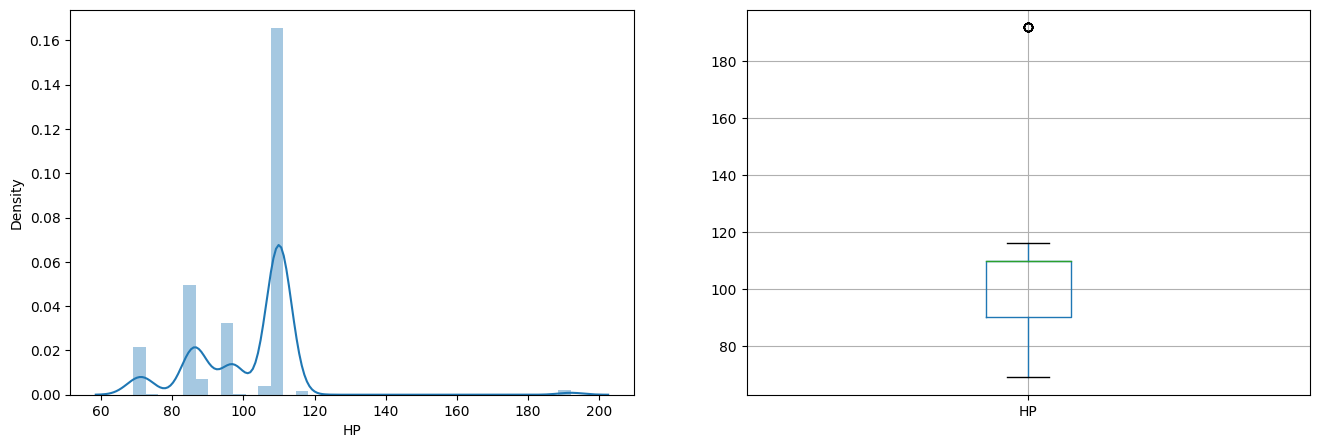

In [84]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['HP'])

plt.subplot(1,2,2)
df4.boxplot('HP')
plt.show()

In [85]:
Q1=df4['HP'].quantile(0.25)
Q3=df4['HP'].quantile(0.75)
IQR=Q3-Q1

In [86]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR
print(Upper_Extreme)
print(Lower_Extreme)

140.0
60.0


In [87]:
df4_outliers= df4[(df4.HP<Lower_Extreme)| (df4.HP>Upper_Extreme) ]

In [88]:
df4_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
8,17200,27,19700.0,Petrol,192,0,1800,3,5,1185
10,17200,25,31461.0,Petrol,192,0,1800,3,6,1185
11,17200,22,43610.0,Petrol,192,0,1800,3,6,1185
12,17200,25,32189.0,Petrol,192,0,1800,3,6,1185
13,17200,31,23000.0,Petrol,192,0,1800,3,6,1185
14,17200,32,34131.0,Petrol,192,0,1800,3,6,1185
15,17200,28,18739.0,Petrol,192,0,1800,3,6,1185
16,17200,30,34000.0,Petrol,192,0,1800,3,5,1185
49,17200,31,64982.0,Petrol,192,0,1800,5,6,1195
53,17200,27,49866.0,Petrol,192,0,1800,5,5,1195


In [89]:
df4.loc[(df4.HP<Lower_Extreme),'HP']=Lower_Extreme
df4.loc[(df4.HP>Upper_Extreme),'HP' ]=Upper_Extreme

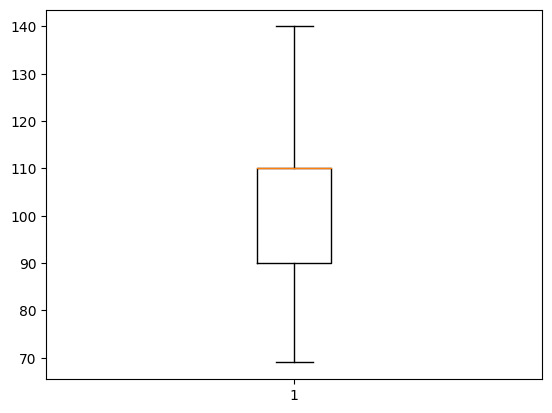

In [90]:
plt.boxplot(df4['HP'])
plt.show()

In [91]:
df=df4.copy()

Automatic don't have any outliers as it only have 2 values that denote the type of gearing

Removing outliers of 'cc'

In [93]:
df['cc'].describe()

count     1435.000000
mean      1576.560976
std        424.387533
min       1300.000000
25%       1400.000000
50%       1600.000000
75%       1600.000000
max      16000.000000
Name: cc, dtype: float64

In [94]:
df5=df.copy()

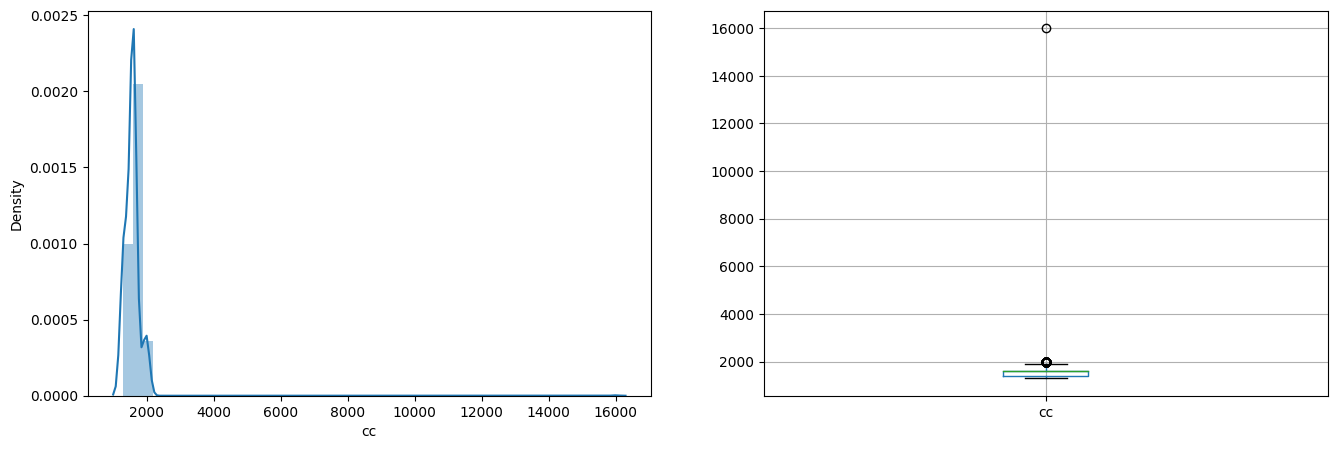

In [95]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df5['cc'])

plt.subplot(1,2,2)
df4.boxplot('cc')
plt.show()

In [97]:
Q1=df5['cc'].quantile(0.25)
Q3=df5['cc'].quantile(0.75)
IQR=Q3-Q1


In [98]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR
print(Upper_Extreme)
print(Lower_Extreme)

1900.0
1100.0


In [99]:
df5_outliers= df5[(df5.cc<Lower_Extreme)| (df2.cc>Upper_Extreme) ]

In [100]:
df5_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,2000,3,5,1165
1,13750,23,72937.0,Diesel,90,0,2000,3,5,1165
2,13950,24,41711.0,Diesel,90,0,2000,3,5,1165
3,14950,26,48000.0,Diesel,90,0,2000,3,5,1165
4,13750,30,38500.0,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1194,8750,74,89800.0,Diesel,72,0,2000,3,5,1115
1201,6950,73,88186.0,Diesel,72,0,2000,3,5,1115
1215,8500,70,85864.0,Diesel,72,0,2000,5,5,1135
1319,9400,69,67092.0,Diesel,72,0,2000,3,5,1115


In [101]:
df5.loc[(df5.cc<Lower_Extreme),'cc']=Lower_Extreme
df5.loc[(df5.cc>Upper_Extreme),'cc' ]=Upper_Extreme

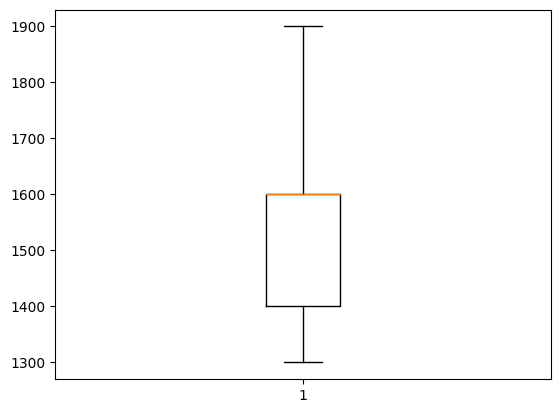

In [102]:
plt.boxplot(df5['cc'])
plt.show()

In [103]:
df=df5.copy()

'doors' and 'gears' should not be cleaned as removing the information on no of gears and doors can have rapid change in the detection of price of the vehicle

Removing outliers of 'weight'

In [105]:
df['Weight'].describe()

count    1435.000000
mean     1072.287108
std        52.251882
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

In [106]:
df6=df.copy()

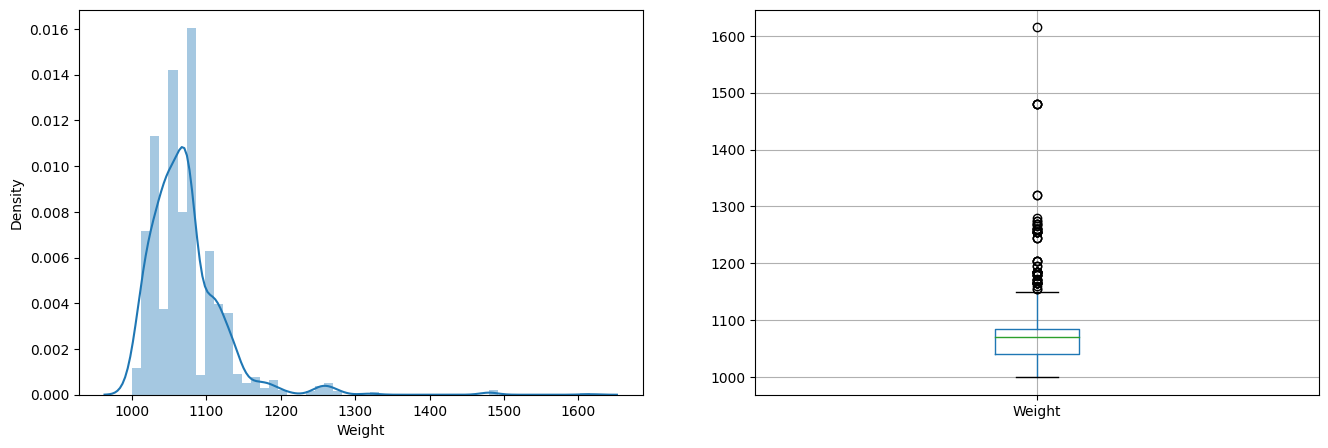

In [107]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df6['Weight'])

plt.subplot(1,2,2)
df6.boxplot('Weight')
plt.show()

In [108]:
Q1=df6['Weight'].quantile(0.25)
Q3=df6['Weight'].quantile(0.75)
IQR=Q3-Q1


In [109]:
Upper_Extreme= Q3+1.5*IQR
Lower_Extreme= Q1-1.5*IQR
print(Upper_Extreme)
print(Lower_Extreme)

1152.5
972.5


In [110]:
df6_outliers= df6[(df6.Weight<Lower_Extreme)| (df6.Weight>Upper_Extreme) ]

In [111]:
df6_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.00,Diesel,90,0,1900,3,5,1165
1,13750,23,72937.00,Diesel,90,0,1900,3,5,1165
2,13950,24,41711.00,Diesel,90,0,1900,3,5,1165
3,14950,26,48000.00,Diesel,90,0,1900,3,5,1165
4,13750,30,38500.00,Diesel,90,0,1900,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
600,7500,50,1.00,Diesel,90,0,1900,3,5,1260
653,6950,65,114383.00,Diesel,90,0,1900,3,5,1260
767,10950,59,78750.00,Diesel,90,0,1900,5,5,1155
959,9390,66,50806.00,Petrol,86,0,1300,3,5,1480


In [112]:
df6.loc[(df6.Weight<Lower_Extreme),'Weight']=Lower_Extreme
df6.loc[(df6.Weight>Upper_Extreme),'Weight' ]=Upper_Extreme

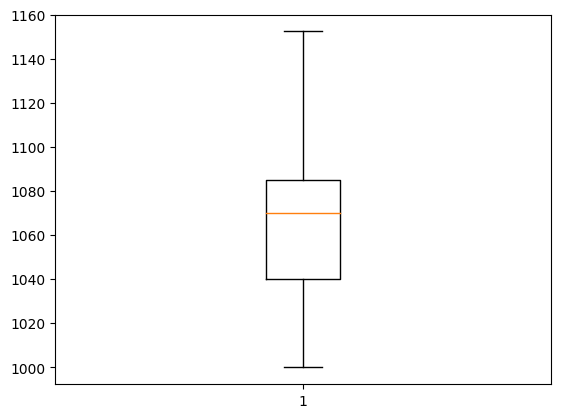

In [114]:
plt.boxplot(df6['Weight'])
plt.show()

In [115]:
df=df6.copy()

In [116]:
## removed all the outlier from the essential numerical variables


In [117]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,1900,3,5,1152.5
1,13750,23,72937.0,Diesel,90,0,1900,3,5,1152.5
2,13950,24,41711.0,Diesel,90,0,1900,3,5,1152.5
3,14950,26,48000.0,Diesel,90,0,1900,3,5,1152.5
4,13750,30,38500.0,Diesel,90,0,1900,3,5,1152.5
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544.0,Petrol,86,0,1300,3,5,1025.0
1431,10845,72,19000.0,Petrol,86,0,1300,3,5,1015.0
1432,8500,71,17016.0,Petrol,86,0,1300,3,5,1015.0
1433,7250,70,16916.0,Petrol,86,0,1300,3,5,1015.0


## labeling

In [121]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [122]:
std_sca= StandardScaler()

In [124]:
df7=df.copy()

In [125]:
df7['KM']=std_sca.fit_transform(df7[['KM']])

In [126]:
df7['KM']

0      -0.595118
1       0.152463
2      -0.747078
3      -0.565908
4      -0.839578
          ...   
1430   -1.356844
1431   -1.401323
1432   -1.458477
1433   -1.461357
1434   -1.948635
Name: KM, Length: 1435, dtype: float64

In [127]:
lab_enc= LabelEncoder()

In [129]:
df7['Fuel_Type']= lab_enc.fit_transform(df7[['Fuel_Type']])

In [130]:
df7

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,-0.595118,1,90,0,1900,3,5,1152.5
1,13750,23,0.152463,1,90,0,1900,3,5,1152.5
2,13950,24,-0.747078,1,90,0,1900,3,5,1152.5
3,14950,26,-0.565908,1,90,0,1900,3,5,1152.5
4,13750,30,-0.839578,1,90,0,1900,3,5,1152.5
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,-1.356844,2,86,0,1300,3,5,1025.0
1431,10845,72,-1.401323,2,86,0,1300,3,5,1015.0
1432,8500,71,-1.458477,2,86,0,1300,3,5,1015.0
1433,7250,70,-1.461357,2,86,0,1300,3,5,1015.0


In [131]:
df7['cc']=std_sca.fit_transform(df7[['cc']])

In [132]:
df7

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,-0.595118,1,90,0,2.024972,3,5,1152.5
1,13750,23,0.152463,1,90,0,2.024972,3,5,1152.5
2,13950,24,-0.747078,1,90,0,2.024972,3,5,1152.5
3,14950,26,-0.565908,1,90,0,2.024972,3,5,1152.5
4,13750,30,-0.839578,1,90,0,2.024972,3,5,1152.5
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,-1.356844,2,86,0,-1.531016,3,5,1025.0
1431,10845,72,-1.401323,2,86,0,-1.531016,3,5,1015.0
1432,8500,71,-1.458477,2,86,0,-1.531016,3,5,1015.0
1433,7250,70,-1.461357,2,86,0,-1.531016,3,5,1015.0


In [133]:
df7['Weight']=std_sca.fit_transform(df7[['Weight']])

In [134]:
df7

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,-0.595118,1,90,0,2.024972,3,5,2.226997
1,13750,23,0.152463,1,90,0,2.024972,3,5,2.226997
2,13950,24,-0.747078,1,90,0,2.024972,3,5,2.226997
3,14950,26,-0.565908,1,90,0,2.024972,3,5,2.226997
4,13750,30,-0.839578,1,90,0,2.024972,3,5,2.226997
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,-1.356844,2,86,0,-1.531016,3,5,-1.154108
1431,10845,72,-1.401323,2,86,0,-1.531016,3,5,-1.419293
1432,8500,71,-1.458477,2,86,0,-1.531016,3,5,-1.419293
1433,7250,70,-1.461357,2,86,0,-1.531016,3,5,-1.419293


#### split data into  training and testing data

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
target=df7['Price']

In [139]:
features=df7.drop('Price',axis=1)

In [141]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=5)

In [142]:
  from sklearn.linear_model import LinearRegression

In [143]:
## Model 1
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [144]:
model1.intercept_

11139.983482194802

In [145]:
model1.coef_

array([-106.14482992, -513.68053143,  769.20249318,   19.23501351,
         28.68017483, -318.40823682, -123.07828638,  473.66172498,
       1005.5454422 ])

In [149]:
y_predict=model1.predict(x_test)

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8283031704256395

In [170]:
### model 2 considering only the first 4 features in x_train


In [177]:
subset_features=['Age_08_04','KM','Fuel_Type','HP']
x_train_subset=x_train[subset_features]
x_test_subset=x_test[subset_features]

In [178]:
model2=LinearRegression()

In [179]:
model2.fit(x_train_subset,y_train)

LinearRegression()

In [180]:
model2.intercept_

15118.335149128477

In [182]:
model2.coef_

array([-127.63952592, -474.92027277, -147.34963194,   27.39916626])

In [183]:
y_predict=model2.predict(x_test_subset)

In [184]:
r2_score(y_test,y_predict)

0.8155669091904962

In [189]:
subset_features_2=['Automatic','cc','Doors','Gears','Weight']
x_train_subset_2=x_train[subset_features_2]
x_test_subset_2=x_test[subset_features_2]

In [211]:
### model 3 considering only the next 4 features in x_train

model3=LinearRegression()

In [191]:
model3.fit(x_train_subset_2,y_train)

LinearRegression()

In [192]:
model3.intercept_

8525.741016280217

In [193]:
model2.coef_

array([-127.63952592, -474.92027277, -147.34963194,   27.39916626])

In [194]:
y_predict=model3.predict(x_test_subset_2)

In [195]:
r2_score(y_test,y_predict)

0.33187864427124747

#### Building Lasso and Ridge models

In [196]:
from sklearn.linear_model import Lasso,Ridge

In [200]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [201]:
y_pred=lasso.predict(x_test)

In [202]:
lasso.coef_

array([-106.21670618, -513.67775637,  753.26193578,   19.46957461,
         11.6877793 , -317.47439838, -121.48557327,  445.57225453,
        999.69116132])

In [203]:
lasso.intercept_

11285.833130604122

In [204]:
r2_score(y_test,y_pred)

0.8287478564561483

In [205]:
Ridge=Ridge(alpha=2)

In [206]:
Ridge.fit(x_train,y_train)

Ridge(alpha=2)

In [207]:
y_pred=Ridge.predict(x_test)

In [208]:
Ridge.coef_

array([-106.32619462, -513.57417714,  741.65563821,   19.5814491 ,
         33.30502571, -317.3321657 , -120.62287423,  455.4506895 ,
        994.77857997])

In [209]:
Ridge.intercept_

11247.992242007718

In [210]:
r2_score(y_test,y_pred)

0.828949116143787

### Interview Questions


1. What is Normalization & Standardization and how is it helpful?


Normalization transforms the data values between 0 to 1 or -1 to 1, defined by the user.It is calculated by

X_new = (X_actual - X_min) /
         (X_max - X_min)

standardization scales the data into values whose mean will be zero and standard deviation is 1. It is calculated by

 X_new = (X_actual - X_mean) /
                X_std

 2. What techniques can be used to address multicollinearity in multiple linear regression?


To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. One can remove the specific variables identified as the most collinear.